In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
# Data Preprocessing
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,NaN,male,1,0,7.2500
1,1,NaN,female,1,0,71.2833
2,3,NaN,female,0,0,7.9250
3,1,NaN,female,1,0,53.1000
4,3,NaN,male,0,0,8.0500


In [20]:
from sklearn.preprocessing import LabelEncoder

In [25]:
from sklearn.model_selection import train_test_split

In [37]:
# Data preprocessing - do this all in one cell
X = df[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare']].copy()
y = df['Survived']

# Handle missing values in Age and Fare columns
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Fare'] = X['Fare'].fillna(X['Fare'].mean())

# Encode the 'Sex' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])

# Verify the data types
print("Data types after preprocessing:")
print(X.dtypes)
print("\nFirst few rows:")
print(X.head())
print(X.info())

Data types after preprocessing:
Pclass      int64
Age       float64
Sex         int64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

First few rows:
   Pclass   Age  Sex  SibSp  Parch     Fare
0       3  22.0    1      1      0   7.2500
1       1  38.0    0      1      0  71.2833
2       3  26.0    0      0      0   7.9250
3       1  35.0    0      1      0  53.1000
4       3  35.0    1      0      0   8.0500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Sex     891 non-null    int64  
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB
None


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models={
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

classification report for Logistic Regression
[[92 13]
 [21 53]]


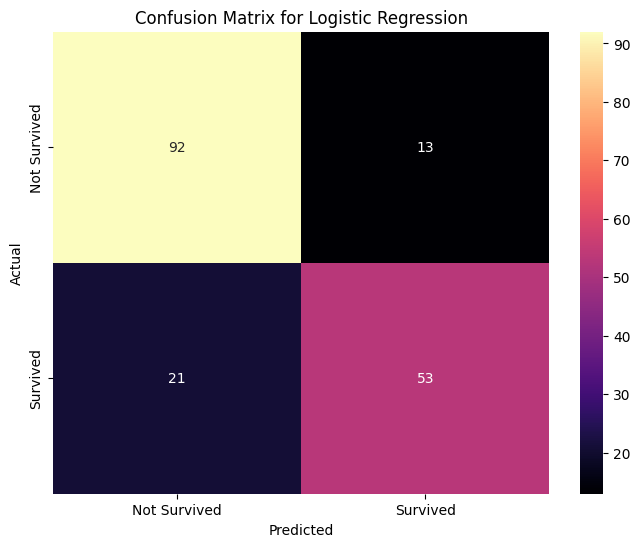

classification report for Support Vector Machine
[[99  6]
 [56 18]]


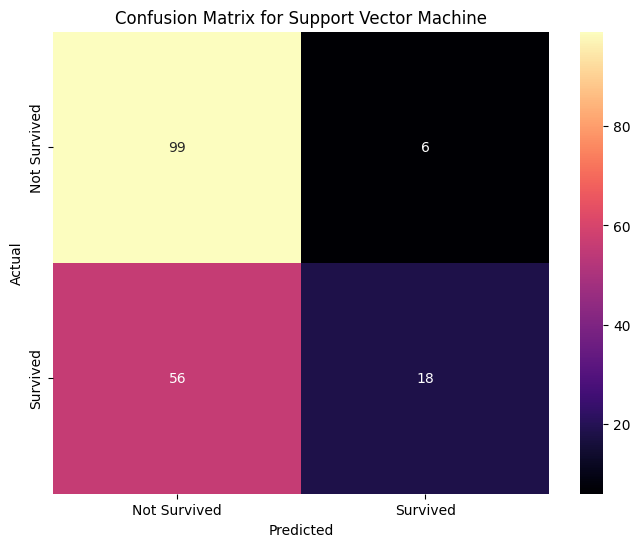

classification report for Random Forest
[[89 16]
 [20 54]]


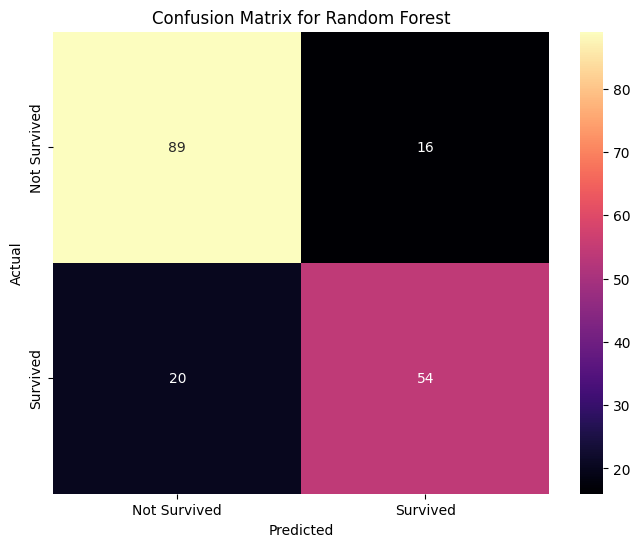

classification report for Naive Bayes
[[85 20]
 [21 53]]


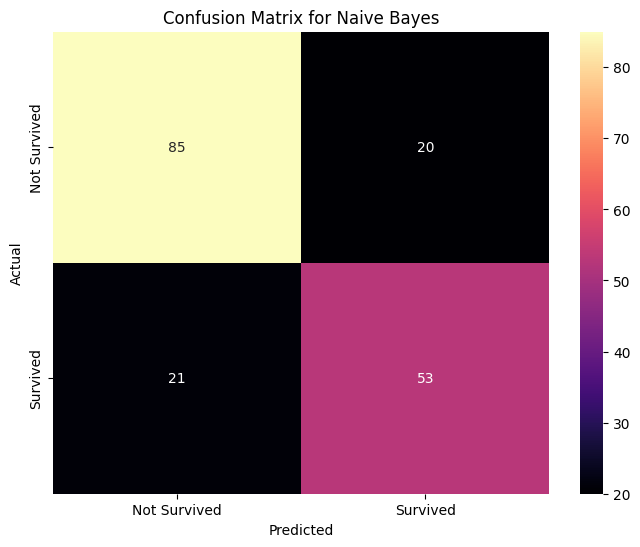

classification report for K-Nearest Neighbors
[[84 21]
 [34 40]]


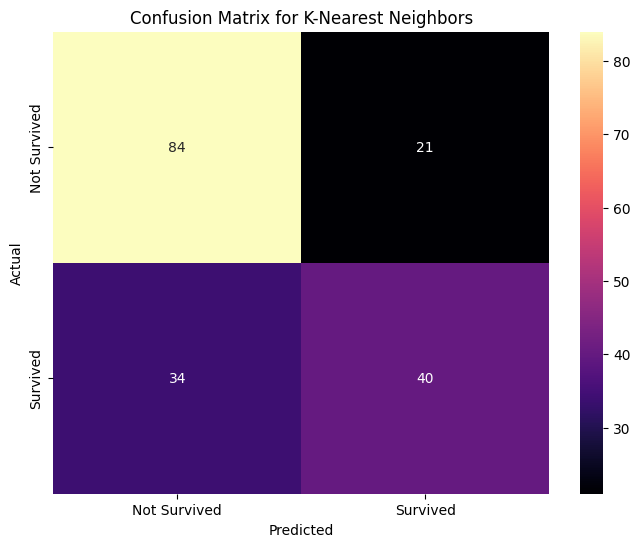

classification report for Decision Tree
[[85 20]
 [22 52]]


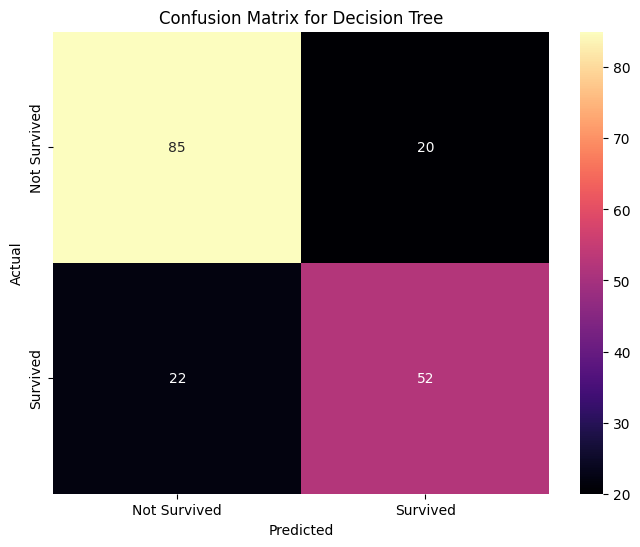

Summary of Results
                     Model  Accuracy  F1 Score  Precision    Recall
0     Logistic Regression  0.810056  0.757143   0.803030  0.716216
1  Support Vector Machine  0.653631  0.367347   0.750000  0.243243
2           Random Forest  0.798883  0.750000   0.771429  0.729730
3             Naive Bayes  0.770950  0.721088   0.726027  0.716216
4     K-Nearest Neighbors  0.692737  0.592593   0.655738  0.540541
5           Decision Tree  0.765363  0.712329   0.722222  0.702703


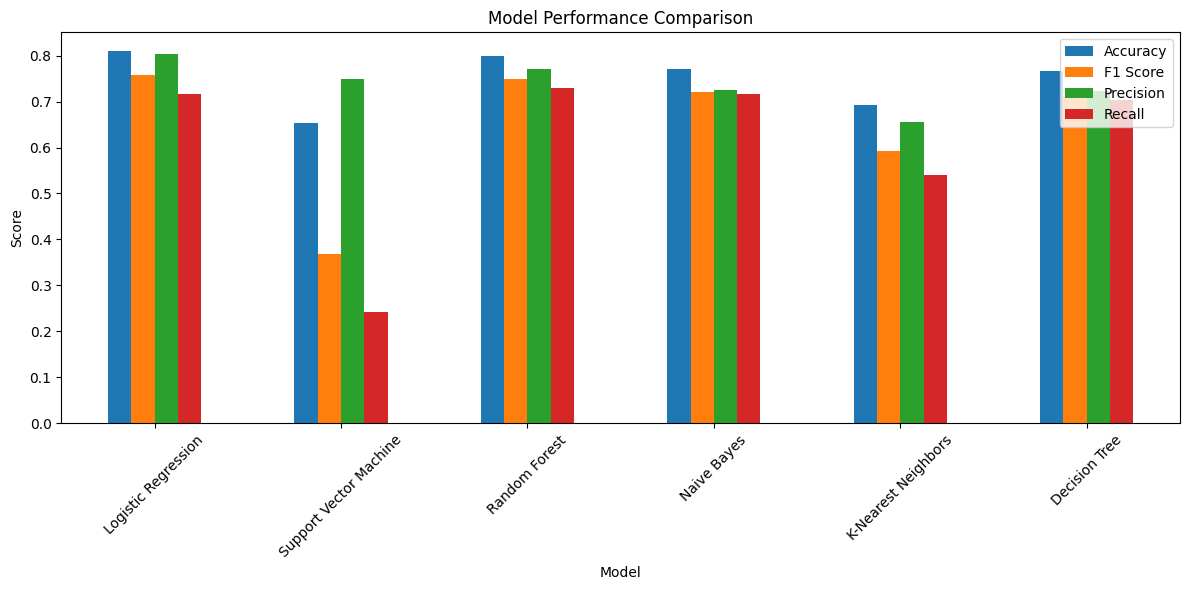

In [45]:
results =[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("classification report for", name)
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    accuracy_score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

    # visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


results_df = pd.DataFrame(results)
print("Summary of Results\n", results_df)

# Visualize the results of all metrics of each model
results_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score') 
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()